In [297]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Loading dataset

In [298]:
df=pd.read_csv('spaceship_train.csv')

In [299]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [300]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [301]:
df.shape

(8693, 14)

In [302]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

False    5439
True     3037
Name: CryoSleep, dtype: int64


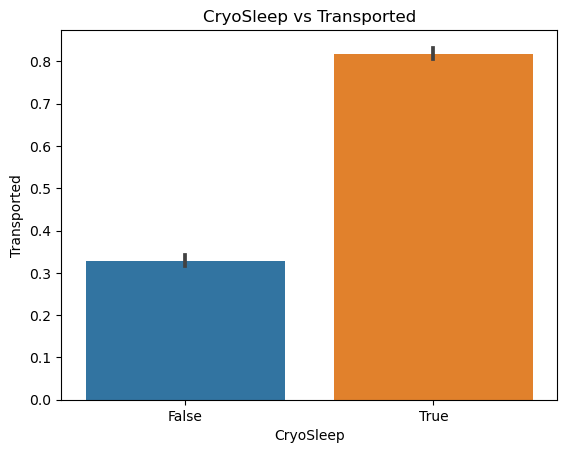

In [303]:
print(df. CryoSleep.value_counts())
sns.barplot(x='CryoSleep', y='Transported', data=df)
plt.title('CryoSleep vs Transported')
plt.show()

False    8291
True      199
Name: VIP, dtype: int64


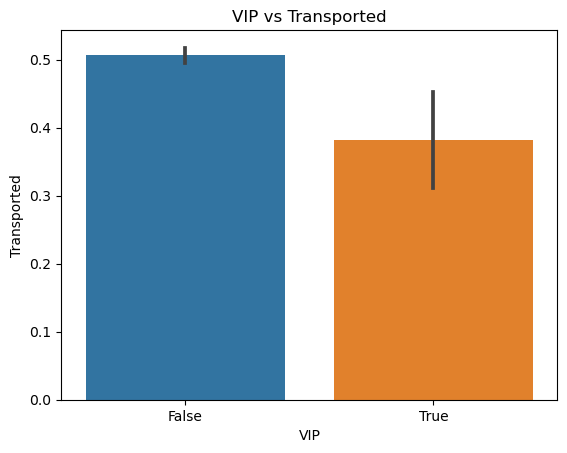

In [304]:
print(df.VIP.value_counts())
sns.barplot(x='VIP', y='Transported', data=df)
plt.title('VIP vs Transported')
plt.show()

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64


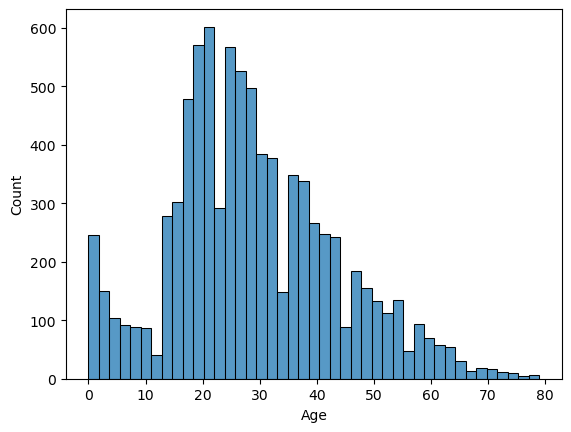

In [305]:
print(df.Age.value_counts())
sns.histplot(x='Age', data=df)
#plt.title('Age vs Transported')
plt.show()

In [306]:
y = df["Transported"]
X = df.drop(columns=['RoomService','FoodCourt', 'ShoppingMall', 'Spa','VRDeck','Name','Transported','Cabin'])

In [307]:
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [308]:
X

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False
...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False
8691,9280_01,Europa,False,55 Cancri e,32.0,False


In [309]:
X['Age'].fillna(X['Age'].mean(), inplace = True)


In [310]:
X['HomePlanet'].fillna(X['HomePlanet'].mode()[0], inplace = True)

In [311]:
X['Destination'].fillna(X['Destination'].mode()[0], inplace = True)

In [312]:
X['VIP'].fillna(X['VIP'].mode()[0], inplace = True)

In [313]:
X=pd.get_dummies(X[['HomePlanet','CryoSleep','Age','Destination','VIP']],drop_first=True)

In [314]:
X['VIP'] = label_encoder.fit_transform(X['VIP'])

In [315]:
X

,Age,VIP,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,39.0,0,1,0,0,0,1
1,24.0,0,0,0,0,0,1
2,58.0,1,1,0,0,0,1
3,33.0,0,1,0,0,0,1
4,16.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
8688,41.0,1,1,0,0,0,0
8689,18.0,0,0,0,1,1,0
8690,26.0,0,0,0,0,0,1
8691,32.0,0,1,0,0,0,0


In [316]:
X.isna().sum()

Age                          0
VIP                          0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_True               0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64

# Classifier

In [317]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state = 3)

In [319]:
print('train:')
print(X_train.shape)
print(y_train.shape)
print('\ntest:')
print(X_test.shape)
print(y_test.shape)

train:
(6085, 7)
(6085,)

test:
(2608, 7)
(2608,)


# Decision tree

In [320]:
tree=DecisionTreeClassifier(random_state=10)
param={'max_depth':[5,10,15,20],
      'min_samples_split':[2,4,6,8]}

In [321]:
model_cv=GridSearchCV(estimator=tree,
                  param_grid=param,
                  scoring='accuracy',
                  cv=3,
                  verbose=1)
model_cv.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='accuracy', verbose=1)

In [322]:
model_cv.best_params_

{'max_depth': 5, 'min_samples_split': 2}

In [323]:
model_cv.best_score_

0.7378823949510532

In [324]:
results_cv=pd.DataFrame(model_cv.cv_results_)

In [325]:
results_cv.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [326]:
results_cv.iloc[:,6:]

,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 2}",0.723509,0.745562,0.744576,0.737882,0.010171,1
1,"{'max_depth': 5, 'min_samples_split': 4}",0.723509,0.745562,0.744576,0.737882,0.010171,1
2,"{'max_depth': 5, 'min_samples_split': 6}",0.723509,0.745562,0.744576,0.737882,0.010171,1
3,"{'max_depth': 5, 'min_samples_split': 8}",0.723509,0.745562,0.744576,0.737882,0.010171,1
4,"{'max_depth': 10, 'min_samples_split': 2}",0.704288,0.722387,0.740631,0.722435,0.014837,6
5,"{'max_depth': 10, 'min_samples_split': 4}",0.704781,0.723866,0.737179,0.721942,0.013297,7
6,"{'max_depth': 10, 'min_samples_split': 6}",0.705766,0.724359,0.738166,0.722764,0.013275,5
7,"{'max_depth': 10, 'min_samples_split': 8}",0.706752,0.719428,0.737673,0.721284,0.012691,8
8,"{'max_depth': 15, 'min_samples_split': 2}",0.680631,0.722387,0.726824,0.709947,0.020809,11
9,"{'max_depth': 15, 'min_samples_split': 4}",0.681124,0.723373,0.724359,0.709618,0.020153,12


In [327]:
tree=DecisionTreeClassifier(max_depth=5,min_samples_split=4,criterion='gini')

In [328]:
tree_classifier=tree.fit(X_train,y_train)

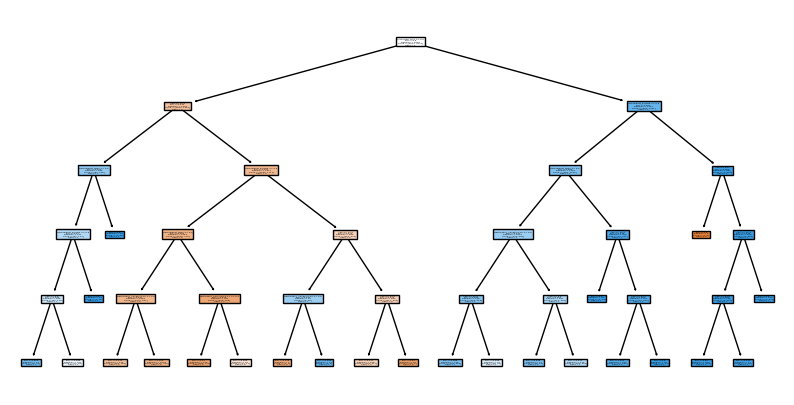

In [329]:
fig = plt.figure(figsize=(10,5))
_ = plot_tree(tree_classifier, 
                   feature_names=['Age','VIP', 'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True','Destination_PSO J318.5-22','Destination_TRAPPIST-1e'],  
                   class_names=['0','1'],filled=True
                   )

fig.savefig("decistion_tree.png")

In [330]:
pred=tree_classifier.predict(X_test)

In [331]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score

In [332]:
accuracy_score(y_test,pred)

0.7269938650306749

In [333]:
recall_score(y_test,pred)

0.6235654169854629

In [334]:
precision_score(y_test,pred)

0.7874396135265701

In [335]:
roc_auc_score(y_test,pred)

0.7272323626049527

# Working on Test data

In [337]:
df1=pd.read_csv('spaceship_test.csv')

In [338]:
X1_test = df.drop(columns=['RoomService','FoodCourt', 'ShoppingMall', 'Spa','VRDeck','Name','Cabin'])

In [339]:
X1_test['Age'].fillna(X1_test['Age'].mean(), inplace = True)

X1_test['HomePlanet'].fillna(X1_test['HomePlanet'].mode()[0], inplace = True)
X1_test['Destination'].fillna(X1_test['Destination'].mode()[0], inplace = True)

X1_test['VIP'].fillna(X1_test['VIP'].mode()[0], inplace = True)
X1_test=pd.get_dummies(X1_test[['HomePlanet','CryoSleep','Age','Destination','VIP']],drop_first=True)
X1_test['VIP'] = label_encoder.fit_transform(X1_test['VIP'])


In [340]:
X1_test.isna().sum()

Age                          0
VIP                          0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_True               0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64

In [341]:
pred1=tree_classifier.predict(X1_test)

In [342]:
Result = pd.DataFrame()
Result['PassengerId'] = passengerId
Result['Transported'] = pred1 == 1
Result.to_csv('Result.csv', index=False)
Result 

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False
